## Data Analysis  of the COVID-19 country-wise dataset.

###  Importing Libraries & Loading Data

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px

In [6]:
# Load the dataset
df = pd.read_csv('covid_data.csv')

### Display basic info and first few rows

In [7]:
df.head()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa


In [8]:
df.shape

(187, 15)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country/Region          187 non-null    object 
 1   Confirmed               187 non-null    int64  
 2   Deaths                  187 non-null    int64  
 3   Recovered               187 non-null    int64  
 4   Active                  187 non-null    int64  
 5   New cases               187 non-null    int64  
 6   New deaths              187 non-null    int64  
 7   New recovered           187 non-null    int64  
 8   Deaths / 100 Cases      187 non-null    float64
 9   Recovered / 100 Cases   187 non-null    float64
 10  Deaths / 100 Recovered  187 non-null    float64
 11  Confirmed last week     187 non-null    int64  
 12  1 week change           187 non-null    int64  
 13  1 week % increase       187 non-null    float64
 14  WHO Region              187 non-null    ob

In [10]:
df.dtypes  # datatypes of each data 

Country/Region             object
Confirmed                   int64
Deaths                      int64
Recovered                   int64
Active                      int64
New cases                   int64
New deaths                  int64
New recovered               int64
Deaths / 100 Cases        float64
Recovered / 100 Cases     float64
Deaths / 100 Recovered    float64
Confirmed last week         int64
1 week change               int64
1 week % increase         float64
WHO Region                 object
dtype: object

In [11]:
df.describe(include='O') # describe about objects

,Country/Region,WHO Region
count,187,187
unique,187,6
top,Afghanistan,Europe
freq,1,56


### Check for missing values

In [12]:
df.isnull().sum() # checks for null values

Country/Region            0
Confirmed                 0
Deaths                    0
Recovered                 0
Active                    0
New cases                 0
New deaths                0
New recovered             0
Deaths / 100 Cases        0
Recovered / 100 Cases     0
Deaths / 100 Recovered    0
Confirmed last week       0
1 week change             0
1 week % increase         0
WHO Region                0
dtype: int64

* Null values are absent 

In [13]:
df.duplicated().sum() # checks if duplicates are present

0

* Since sum is 0 there are no duplicates

## Data Visualization using Count Plot,Bar plot ,Scatter Plot ,histplot,Heat Map,Violin Plot

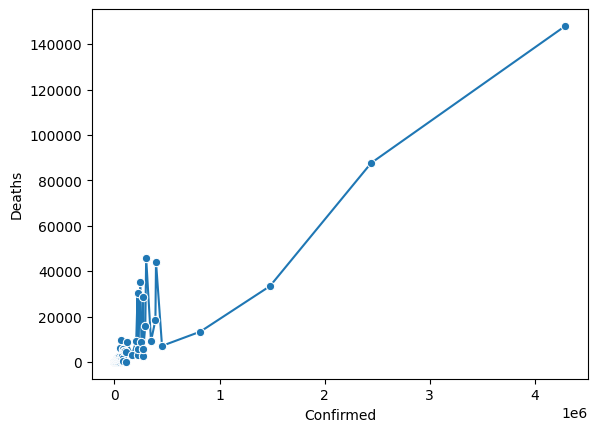

In [14]:
# lineplot showing Confirmed cases vs death cases

sns.lineplot(data=df,x="Confirmed",y="Deaths",marker='o')
plt.show()

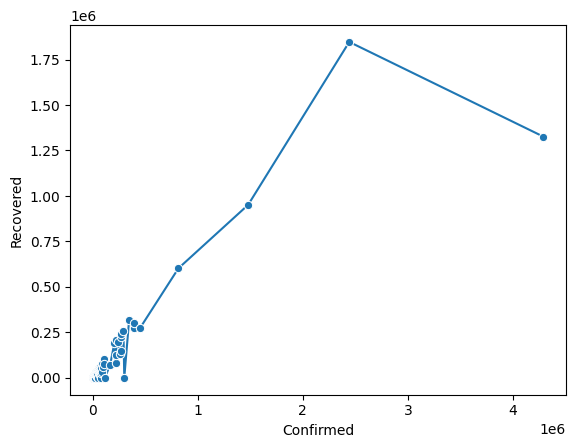

In [15]:
sns.lineplot(data=df,x="Confirmed",y="Recovered",marker='o')
plt.show()

####  WHO Regions with Zero Active Cases

C:\Users\adinr\AppData\Local\Temp\ipykernel_12708\2059751382.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=zero_active['WHO Region'], palette='Purples_r')


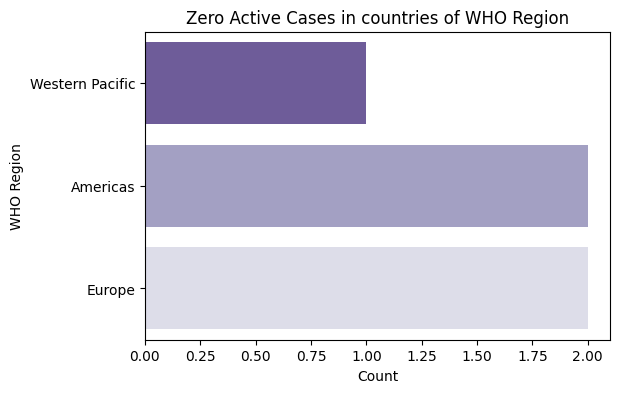

In [16]:
# Countries with zero active cases
zero_active = df[df['Active'] == 0]

# Count plot
plt.figure(figsize=(6, 4))
sns.countplot(y=zero_active['WHO Region'], palette='Purples_r')
plt.xlabel("Count")
plt.ylabel("WHO Region")
plt.title("Zero Active Cases in countries of WHO Region")
plt.show()

In [17]:
# Countries with zero new cases 
zero_new = df[df['New cases']==0]

# printing count of zero cases in  each WHO Regions 
print(zero_new.groupby('WHO Region').count())

                 Country/Region  Confirmed  Deaths  Recovered  Active  \
WHO Region                                                              
Africa                       12         12      12         12      12   
Americas                      8          8       8          8       8   
Europe                        7          7       7          7       7   
South-East Asia               2          2       2          2       2   
Western Pacific               4          4       4          4       4   

                 New cases  New deaths  New recovered  Deaths / 100 Cases  \
WHO Region                                                                  
Africa                  12          12             12                  12   
Americas                 8           8              8                   8   
Europe                   7           7              7                   7   
South-East Asia          2           2              2                   2   
Western Pacific          4

C:\Users\adinr\AppData\Local\Temp\ipykernel_12708\506044885.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=zero_new['WHO Region'], palette='Purples_r')


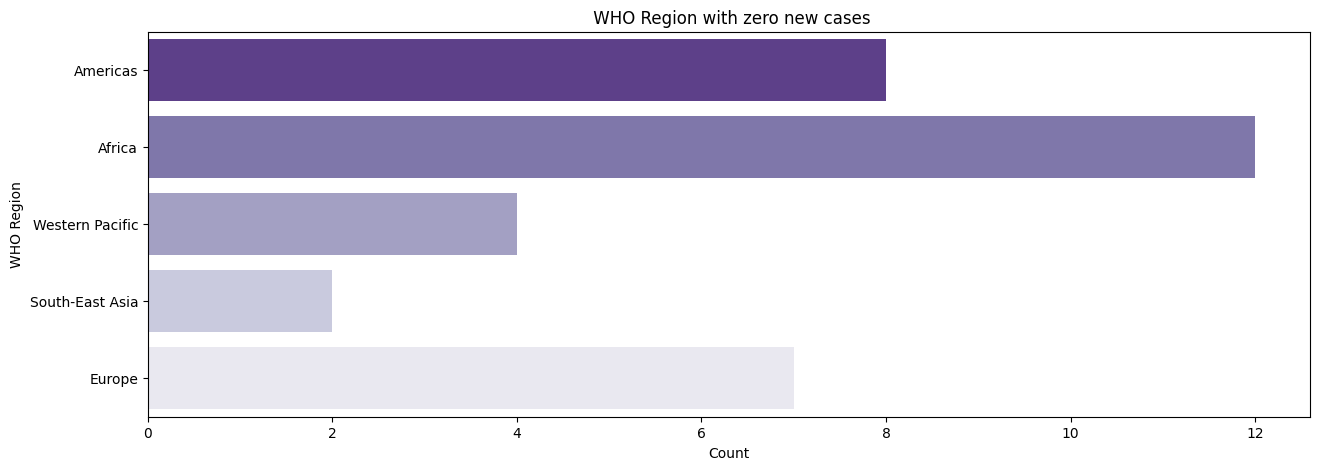

In [18]:
# Count plot 
plt.figure(figsize=(15, 5))
sns.countplot(y=zero_new['WHO Region'], palette='Purples_r')
plt.xlabel("Count")
plt.ylabel("WHO Region")
plt.title(" WHO Region with zero new cases")
plt.show()

In [19]:
# WHO Regions with confirmed cases 
print(df[['WHO Region', 'Confirmed']])

top_who = df[['WHO Region', 'Confirmed']].sort_values(by='Confirmed', ascending=False).head(10)


                WHO Region  Confirmed
0    Eastern Mediterranean      36263
1                   Europe       4880
2                   Africa      27973
3                   Europe        907
4                   Africa        950
..                     ...        ...
182  Eastern Mediterranean      10621
183                 Africa         10
184  Eastern Mediterranean       1691
185                 Africa       4552
186                 Africa       2704

[187 rows x 2 columns]


C:\Users\adinr\AppData\Local\Temp\ipykernel_12708\4235195731.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Confirmed', y='WHO Region', data=top_who, palette='Reds_r')


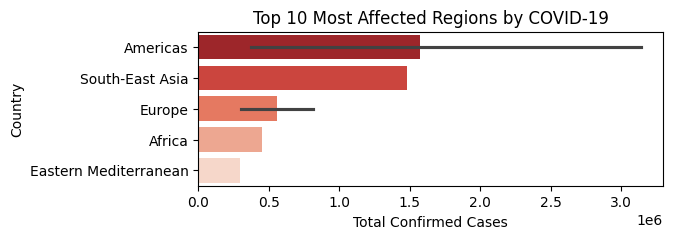

In [20]:
# Bar plot showing Top 10 WHO Regions with the highest number of confirmed cases
plt.figure(figsize=(6,2))
sns.barplot(x='Confirmed', y='WHO Region', data=top_who, palette='Reds_r')
plt.xlabel("Total Confirmed Cases")
plt.ylabel("Country")
plt.title("Top 10 Most Affected Regions by COVID-19")
plt.show()

### Top 10 Most Affected Countries 

In [21]:
# Selecting top 10 affected countries into a new dataframe
print(df[['Country/Region', 'Confirmed']])
top_countries = df[['Country/Region', 'Confirmed']].sort_values(by='Confirmed', ascending=False).head(10)

         Country/Region  Confirmed
0           Afghanistan      36263
1               Albania       4880
2               Algeria      27973
3               Andorra        907
4                Angola        950
..                  ...        ...
182  West Bank and Gaza      10621
183      Western Sahara         10
184               Yemen       1691
185              Zambia       4552
186            Zimbabwe       2704

[187 rows x 2 columns]


C:\Users\adinr\AppData\Local\Temp\ipykernel_12708\3158265668.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Confirmed', y='Country/Region', data=top_countries, palette='Reds_r')


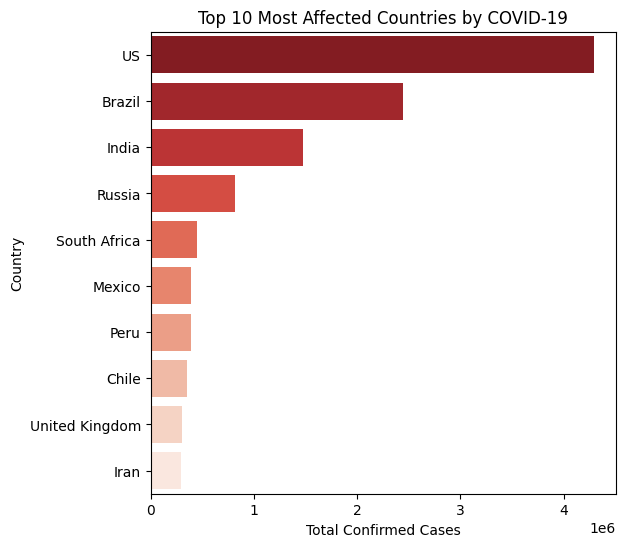

In [22]:
# Bar plot
plt.figure(figsize=(6, 6))
sns.barplot(x='Confirmed', y='Country/Region', data=top_countries, palette='Reds_r')
plt.xlabel("Total Confirmed Cases")
plt.ylabel("Country")
plt.title("Top 10 Most Affected Countries by COVID-19")
plt.show()

* US is most affected country followed by Brazil and india in 2nd and 3rd position

## Country wise analysis - US

In [23]:
# Filtering details of country- US in a new dataframe
countries_of_interest = ['US']
df_filtered = df[df['Country/Region'].isin(countries_of_interest)]
print(df_filtered)

    Country/Region  Confirmed  Deaths  Recovered   Active  New cases  \
173             US    4290259  148011    1325804  2816444      56336   

     New deaths  New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
173        1076          27941                3.45                   30.9   

     Deaths / 100 Recovered  Confirmed last week  1 week change  \
173                   11.16              3834677         455582   

     1 week % increase WHO Region  
173              11.88   Americas  


In [24]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, 173 to 173
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country/Region          1 non-null      object 
 1   Confirmed               1 non-null      int64  
 2   Deaths                  1 non-null      int64  
 3   Recovered               1 non-null      int64  
 4   Active                  1 non-null      int64  
 5   New cases               1 non-null      int64  
 6   New deaths              1 non-null      int64  
 7   New recovered           1 non-null      int64  
 8   Deaths / 100 Cases      1 non-null      float64
 9   Recovered / 100 Cases   1 non-null      float64
 10  Deaths / 100 Recovered  1 non-null      float64
 11  Confirmed last week     1 non-null      int64  
 12  1 week change           1 non-null      int64  
 13  1 week % increase       1 non-null      float64
 14  WHO Region              1 non-null      object 

## Analysing done on selected countries

In [25]:
# Analysing two selected countries Active status

In [26]:
countries_of_interest = ['Afghanistan', 'Nepal']  # we can select any country of our choice here
df_filtered = df[df['Country/Region'].isin(countries_of_interest)]
print(df_filtered)

    Country/Region  Confirmed  Deaths  Recovered  Active  New cases  \
0      Afghanistan      36263    1269      25198    9796        106   
119          Nepal      18752      48      13754    4950        139   

     New deaths  New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
0            10             18                3.50                  69.49   
119           3            626                0.26                  73.35   

     Deaths / 100 Recovered  Confirmed last week  1 week change  \
0                      5.04                35526            737   
119                    0.35                17844            908   

     1 week % increase             WHO Region  
0                 2.07  Eastern Mediterranean  
119               5.09        South-East Asia  


  Country/Region  Confirmed  Deaths  Recovered  Active  New cases  New deaths  \
0    Afghanistan      36263    1269      25198    9796        106          10   

   New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
0             18                 3.5                  69.49   

   Deaths / 100 Recovered  Confirmed last week  1 week change  \
0                    5.04                35526            737   

   1 week % increase             WHO Region  
0               2.07  Eastern Mediterranean  
    Country/Region  Confirmed  Deaths  Recovered  Active  New cases  \
119          Nepal      18752      48      13754    4950        139   

     New deaths  New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
119           3            626                0.26                  73.35   

     Deaths / 100 Recovered  Confirmed last week  1 week change  \
119                    0.35                17844            908   

     1 week % increase       WHO Region  
119         

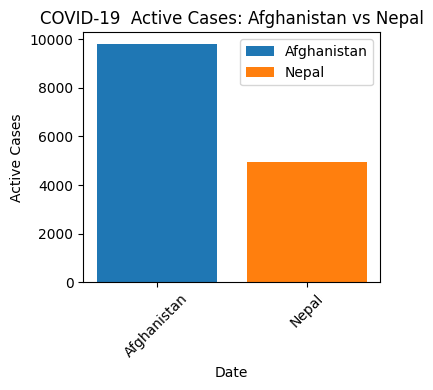

In [27]:
plt.figure(figsize=(4, 4))
for country in countries_of_interest:
    data = df_filtered[df_filtered['Country/Region'] == country]
    print(data)
    plt.bar(data['Country/Region'], data['Active'], label=country)  # assuming 'Confirmed' column

plt.title('COVID-19  Active Cases: Afghanistan vs Nepal')
plt.xlabel('Date')
plt.ylabel('Active Cases')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [28]:
df_filtered.head()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
119,Nepal,18752,48,13754,4950,139,3,626,0.26,73.35,0.35,17844,908,5.09,South-East Asia


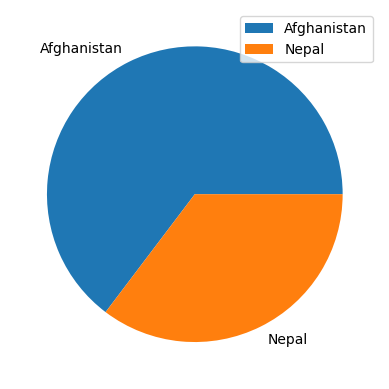

In [29]:
plt.pie(df_filtered['Recovered'],labels=['Afghanistan','Nepal'])
plt.legend()
plt.show()

* More Recovered cases in Afghanistan compared to Nepal

## Analysing a particular WHO Region

In [30]:
# filtering Americas Region
Regions = ['Americas']
df_filtered = df[df['WHO Region'].isin(Regions)]
print(df_filtered)

                       Country/Region  Confirmed  Deaths  Recovered   Active  \
5                 Antigua and Barbuda         86       3         65       18   
6                           Argentina     167416    3059      72575    91782   
11                            Bahamas        382      11         91      280   
14                           Barbados        110       7         94        9   
17                             Belize         48       2         26       20   
20                            Bolivia      71181    2647      21478    47056   
23                             Brazil    2442375   87618    1846641   508116   
32                             Canada     116458    8944          0   107514   
35                              Chile     347923    9187     319954    18782   
37                           Colombia     257101    8777     131161   117163   
41                         Costa Rica      15841     115       3824    11902   
44                               Cuba   

In [31]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35 entries, 5 to 180
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country/Region          35 non-null     object 
 1   Confirmed               35 non-null     int64  
 2   Deaths                  35 non-null     int64  
 3   Recovered               35 non-null     int64  
 4   Active                  35 non-null     int64  
 5   New cases               35 non-null     int64  
 6   New deaths              35 non-null     int64  
 7   New recovered           35 non-null     int64  
 8   Deaths / 100 Cases      35 non-null     float64
 9   Recovered / 100 Cases   35 non-null     float64
 10  Deaths / 100 Recovered  35 non-null     float64
 11  Confirmed last week     35 non-null     int64  
 12  1 week change           35 non-null     int64  
 13  1 week % increase       35 non-null     float64
 14  WHO Region              35 non-null     object 


In [32]:
df_filtered.head()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
5,Antigua and Barbuda,86,3,65,18,4,0,5,3.49,75.58,4.62,76,10,13.16,Americas
6,Argentina,167416,3059,72575,91782,4890,120,2057,1.83,43.35,4.21,130774,36642,28.02,Americas
11,Bahamas,382,11,91,280,40,0,0,2.88,23.82,12.09,174,208,119.54,Americas
14,Barbados,110,7,94,9,0,0,0,6.36,85.45,7.45,106,4,3.77,Americas
17,Belize,48,2,26,20,0,0,0,4.17,54.17,7.69,40,8,20.00,Americas


In [33]:
top_in_americas = df[['Country/Region', 'Deaths']].sort_values(by='Deaths', ascending=False).head(5)
top_in_americas.head(2)

,Country/Region,Deaths
173,US,148011
23,Brazil,87618


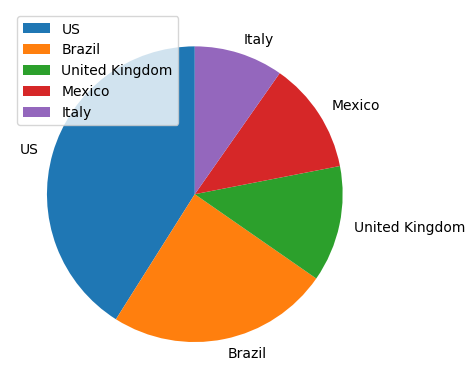

In [34]:
plt.pie(top_in_americas['Deaths'],labels=top_in_americas['Country/Region'],startangle=90)
plt.legend()
plt.show()

* In Americas Region US tops in Deaths cases

Text(0.5, 1.0, 'histplot showing Recovered cases')

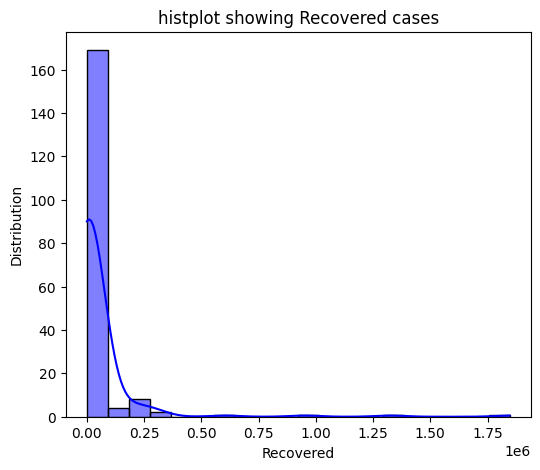

In [35]:
plt.figure(figsize=(6,5))
sns.histplot(df["Recovered"],bins=20,kde=True,color="blue")
plt.xlabel("Recovered")
plt.ylabel("Distribution")
plt.title("histplot showing Recovered cases")

Text(0.5, 1.0, 'histplot of Confirmed cases')

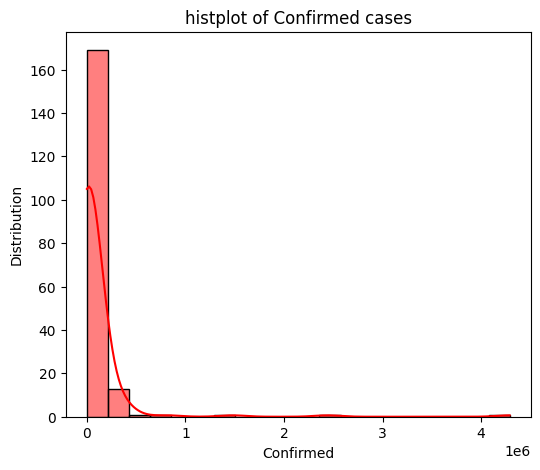

In [36]:
plt.figure(figsize=(6,5))
sns.histplot(df["Confirmed"],bins=20,kde=True,color="red")
plt.xlabel("Confirmed")
plt.ylabel("Distribution")
plt.title("histplot of Confirmed cases")

Text(0.5, 1.0, 'histplot showing Death cases')

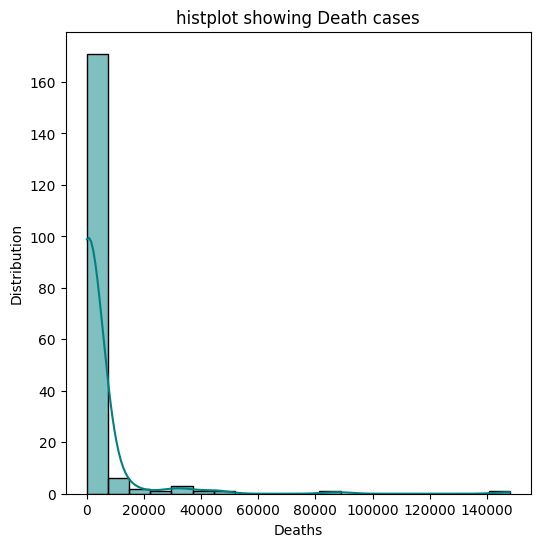

In [37]:
plt.figure(figsize=(6,6))
sns.histplot(df["Deaths"],bins=20,kde=True,color="teal")
plt.xlabel("Deaths")
plt.ylabel("Distribution")
plt.title("histplot showing Death cases")

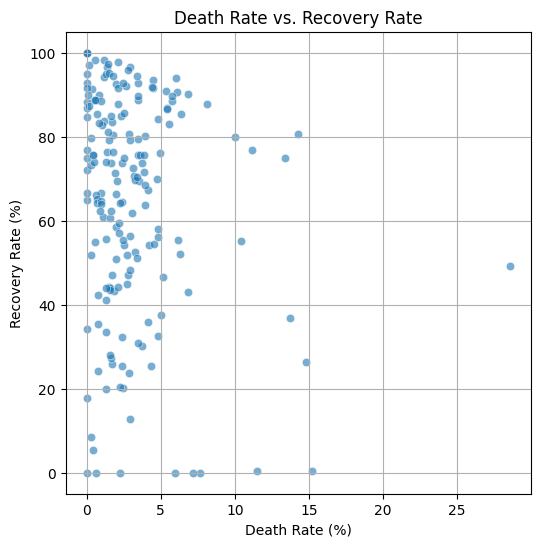

In [38]:
# Scatter plot: Death Rate vs. Recovery Rate
plt.figure(figsize=(6, 6))
sns.scatterplot(x=df['Deaths / 100 Cases'],      # X-axis: Death Rate per 100 cases
                y=df['Recovered / 100 Cases'],   # Y-axis: Recovery Rate per 100 cases
                alpha=0.6)                       # Makes points slightly transparent
plt.xlabel("Death Rate (%)")               
plt.ylabel("Recovery Rate (%)")
plt.title("Death Rate vs. Recovery Rate")
plt.grid(True)
plt.show()

## Active vs. Recovered Cases by Country

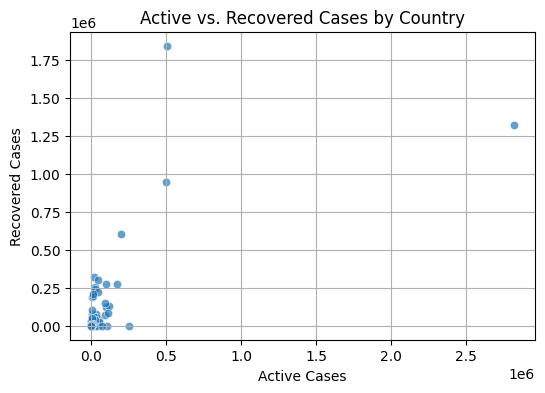

In [39]:
# Scatter plot: Active vs. Recovered cases
plt.figure(figsize=(6,4))
sns.scatterplot(x=df['Active'], y=df['Recovered'], alpha=0.7)
plt.xlabel("Active Cases")
plt.ylabel("Recovered Cases")
plt.title("Active vs. Recovered Cases by Country")
plt.grid(True)
plt.show()

## Correlation Analysis

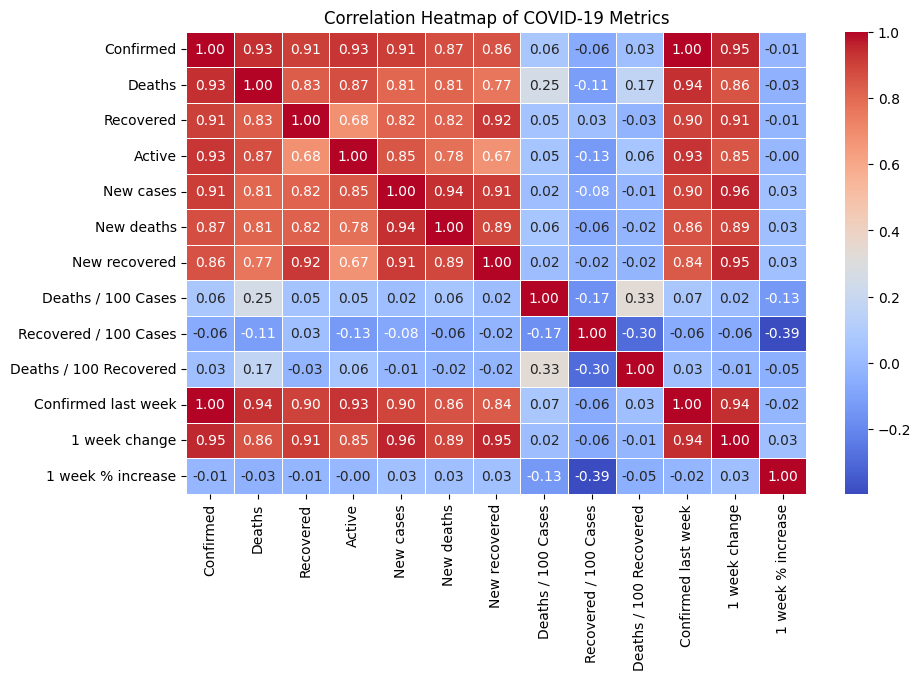

In [40]:
# Select only numerical columns
numeric_df = df.select_dtypes(include=['number'])

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of COVID-19 Metrics")
plt.show()

In [41]:
# Correlation heatmaps can be used to find potential relationships between variables and to understand the strength of these relationships. 
# More strong correlation between variables are seen 
# higher correlations tending towards -1 and +1
# poorer correlations tending towards 0

## Analysis

In [42]:
df['Country/Region'].value_counts()

Country/Region
Afghanistan    1
Pakistan       1
Nepal          1
Netherlands    1
New Zealand    1
              ..
Georgia        1
Germany        1
Ghana          1
Greece         1
Zimbabwe       1
Name: count, Length: 187, dtype: int64

In [43]:
df['Country/Region']=='Afghanistan'

0       True
1      False
2      False
3      False
4      False
       ...  
182    False
183    False
184    False
185    False
186    False
Name: Country/Region, Length: 187, dtype: bool

 ##  Weekly % Increase in Cases

C:\Users\adinr\AppData\Local\Temp\ipykernel_12708\4144739633.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='1 week % increase', y='Country/Region', data=top_growth, palette='Blues_r')


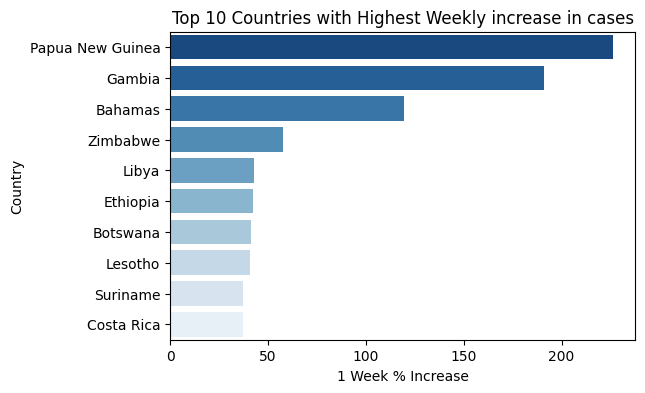

In [44]:
# Top 10 countries with the highest weekly % increase
top_growth = df[['Country/Region', '1 week % increase']].sort_values(by='1 week % increase', ascending=False).head(10)

# Bar plot
plt.figure(figsize=(6, 4))
sns.barplot(x='1 week % increase', y='Country/Region', data=top_growth, palette='Blues_r')
plt.xlabel("1 Week % Increase")
plt.ylabel("Country")
plt.title("Top 10 Countries with Highest Weekly increase in cases")
plt.show()

## Mortality Rate Across WHO Regions

C:\Users\adinr\AppData\Local\Temp\ipykernel_12708\366805638.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['WHO Region'], y=df['Deaths / 100 Cases'], palette='magma')


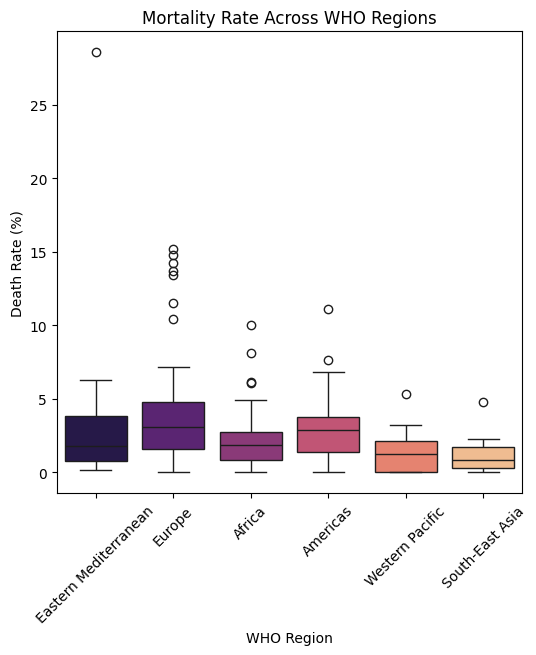

In [45]:
# Boxplot of death rate in WHO region
plt.figure(figsize=(6, 6))
sns.boxplot(x=df['WHO Region'], y=df['Deaths / 100 Cases'], palette='magma')
plt.xlabel("WHO Region")
plt.ylabel("Death Rate (%)")
plt.title("Mortality Rate Across WHO Regions")
plt.xticks(rotation=45)
plt.show()

* Europe has highest Death rate 
* Eastern Mediterranean,Western Pacific and South-East-Asia  has least outliers

Text(0.5, 1.0, 'Distribution of Deaths / 100 Cases for each WHO Region')

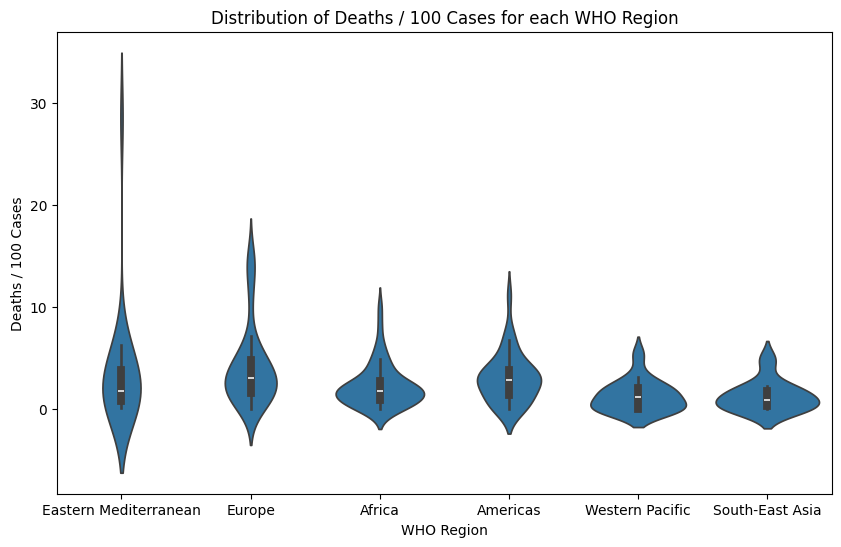

In [46]:
plt.figure(figsize=(10, 6))
sns.violinplot(x ="WHO Region", 
             y ="Deaths / 100 Cases", 
             data = df)
plt.title("Distribution of Deaths / 100 Cases for each WHO Region")

## Recovery Rate Distribution

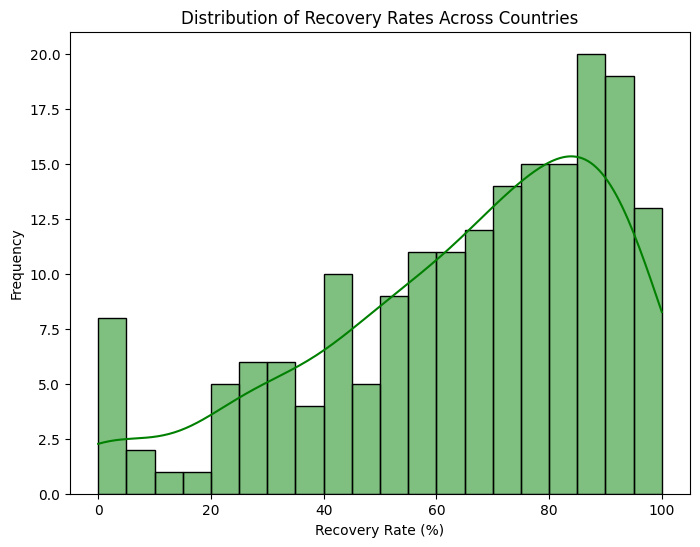

In [47]:
# Histogram of recovery rate
plt.figure(figsize=(8, 6))
sns.histplot(df['Recovered / 100 Cases'], bins=20, kde=True, color='green')
plt.xlabel("Recovery Rate (%)")
plt.ylabel("Frequency")
plt.title("Distribution of Recovery Rates Across Countries")
plt.show()

* 85% -90%  recovery cases are more followed by 90%-95% recovery cases